# Step1 - Dependencies 
# and Read files 
# and Create DataFrames

In [5]:
# Add Matplotlib inline magic command
%matplotlib inline

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [7]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [8]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(2)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban


In [9]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(2)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577


# Step 2 - Check nulls in files and dtypes

In [10]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [11]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [16]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]== 'Urban')

66

In [17]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]== 'Suburban')

36

In [18]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]== 'Rural')

18

# Step 3 - Merge two dataframes and create sub dataframes

In [19]:
pyber_data_df = pd.merge(city_data_df, ride_data_df, how = "left", on= ["city", "city"])
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [20]:
# create sub data frame urban_cities_df
 
urban_cities_df = pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head(2)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494


In [21]:
# create sub data frame suburban_cities_df 
rural_cities_df = pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_cities_df.head(2)

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2019-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2019-03-07 19:10:13,48.79,9730627367446


In [22]:
# create sub data frame suburban_cities_df 
suburban_cities_df = pyber_data_df[pyber_data_df["type"]== "Suburban"]
suburban_cities_df.head(2)

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2019-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2019-04-23 16:05:47,42.26,8341982666719


# Step 4 Per City :Get : Total # of rides, Avg fare,  Average # of Drivers

In [23]:
# Total # of rides by urban_cities_df - Per City
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [24]:
# Total # of rides by rural_cities_df - Per City
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
# Total # of rides by suburban_cities_df - Per City
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [26]:
# Avg Fare by urban_cities_df - Per City
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [27]:
# Avg Fare by rural_cities_df
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [28]:
# Avg Fare by suburban_cities_df - Per City
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
# Get the average number of drivers for each urban city. - Per City
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [30]:
# Get the average number of drivers for each rural city. - Per City
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [31]:
# Get the average number of drivers for each suburban city. - Per City
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

# Step 5 - Create Scattered Chart

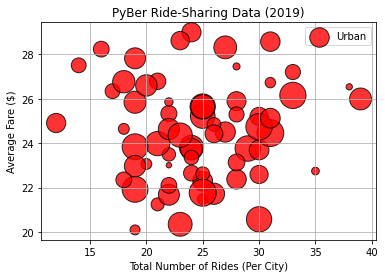

In [32]:
# Scatterd Chart for Urban 
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, facecolors ="red", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Urban")
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()

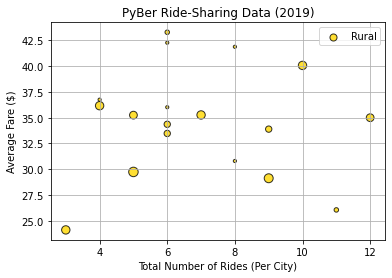

In [33]:
# Scatterd Chart for rural
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, facecolors ="gold", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Rural")
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()

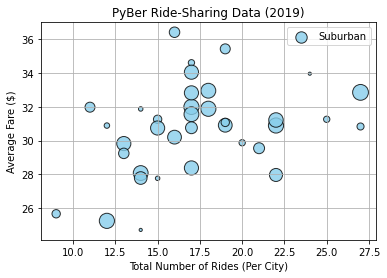

In [34]:
# Scatterd Chart for suburban
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, facecolors ="skyblue", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Suburban")
plt.legend()
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.show()

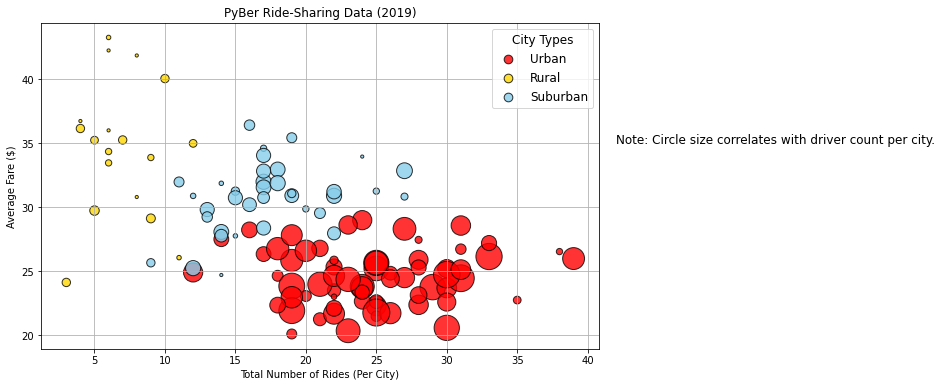

In [35]:
# Scatter chart for all cities combined
plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, facecolors ="red", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Urban")

plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, facecolors ="gold", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Rural")

plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, facecolors ="skyblue", 
            edgecolors ='black', linewidths = 1, alpha = 0.8, label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

# Step 6 - get statistics

In [36]:
# Get summary statistics.
urban_cities_df.describe()

,driver_count,fare,ride_id
count,1625.000000,1625.000000,1.625000e+03
mean,36.678154,24.525772,4.873485e+12
std,20.075545,11.738649,2.907440e+12
min,3.000000,4.050000,1.458810e+10
25%,22.000000,14.550000,2.400244e+12
50%,37.000000,24.640000,4.711188e+12
75%,52.000000,34.580000,7.451579e+12
max,73.000000,44.970000,9.991538e+12


In [37]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [39]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [40]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


## 6.1 Get mean fare by urban, rural, suburban

In [43]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]

In [44]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

In [45]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

In [46]:
# Get Mean of fare by urban, rural, suburban

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is $: {mean_urban_fares:.2f}")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is $: {mean_suburban_fares:.2f}")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is $: {mean_rural_fares:.2f}")

The mean fare price for urban trips is $: 24.53
The mean fare price for suburban trips is $: 30.97
The mean fare price for rural trips is $: 34.62


In [47]:
# Get Median of the fares by urban, rural, suburban
median_urban_fares = np.median(urban_fares)
print(f" Median fare price for urban trips is $ : {median_urban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f" Median fare price for suburban trips is $ : {median_suburban_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f" Median fare price for rural trips is $ : {median_rural_fares:.2f}")

 Median fare price for urban trips is $ : 24.64
 Median fare price for suburban trips is $ : 30.75
 Median fare price for rural trips is $ : 37.05


## 6.2 Summary Statistics for the "Number of Drivers by City Type

In [48]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0    38
1    38
2    38
3    38
4    38
Name: driver_count, dtype: int64

In [49]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    7
1626    7
1627    7
1628    7
1629    7
Name: driver_count, dtype: int64

In [50]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    7
2251    7
2252    7
2253    7
2254    7
Name: driver_count, dtype: int64

In [51]:
# Get Mean of fare by urban, rural, suburban

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of dirvers for urban: {mean_urban_drivers:.2f}")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of dirvers for suburban : {mean_suburban_drivers:.2f}")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of dirvers for rural: {mean_rural_drivers:.2f}")

The mean number of dirvers for urban: 36.68
The mean number of dirvers for suburban : 13.71
The mean number of dirvers for rural: 4.30


## 6.3 Create Box-and-Whisker Plots

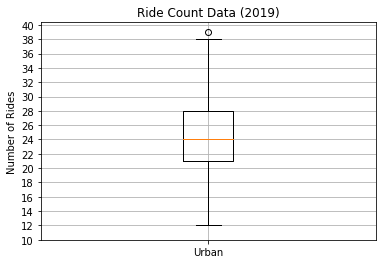

In [52]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

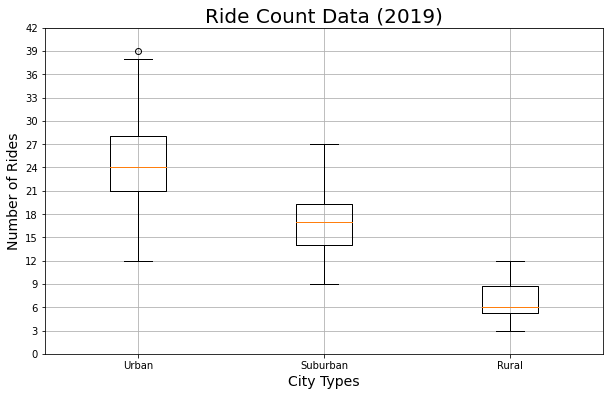

In [53]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("Analysis/Fig2.png")
plt.show()

In [54]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
urban_city_outlier

'West Angela'

In [55]:
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Check this one with TAs

In [56]:
urban_drivers = urban_cities_df.groupby(["city"]).unique()["driver_count"]
urban_drivers

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

# 7.1  Get the Percentage of Fares for Each City Type

In [ ]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

In [ ]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

In [ ]:
type_percent = sum_fares_by_type/ total_fares *100
type_percent

In [ ]:
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        autopct='%.1f%%',
        explode=[0, 0, 0.1],
        shadow=True, startangle=150)
#plt.subplots(figsize=(8,8))
plt.show()

# 7.2  Get the Percentage of Drivers for Each City Type

In [57]:
total_drivers = city_data_df["driver_count"].sum()
total_drivers

2973

In [60]:
driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"]/total_drivers *100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

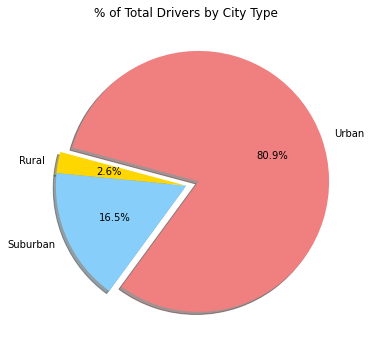

In [71]:
plt.subplots(figsize=(10, 6))

plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        autopct='%.1f%%',
        explode=[0, 0, 0.1],
        shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("analysis/Fig7.png")

plt.show()